<a href="https://colab.research.google.com/github/synergit/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-/blob/dev/deep_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip3 install torch

In [65]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

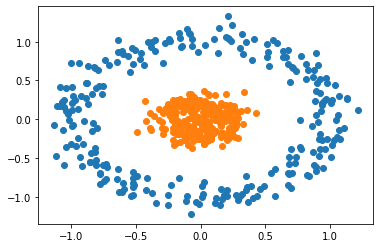

In [66]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1]) 
  plt.scatter(X[y==1, 0], X[y==1, 1])

scatter_plot()

In [67]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size): # H1 hidden layer
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)


  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    pred = torch.sigmoid(self.linear2(x))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [68]:
torch.manual_seed(2)
model = Model(2, 3, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683]], requires_grad=True), Parameter containing:
tensor([-0.0813, -0.5717,  0.1614], requires_grad=True), Parameter containing:
tensor([[-0.5112,  0.0759,  0.0384]], requires_grad=True), Parameter containing:
tensor([-0.1270], requires_grad=True)]


In [69]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


In [70]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  # print(f'epoch: {i}, loss: {loss.item()}')
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Text(0, 0.5, 'epoch')

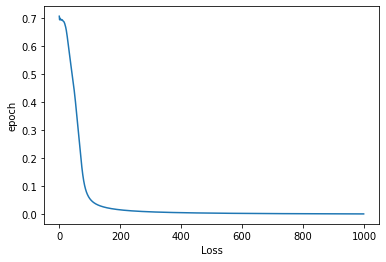

In [71]:
plt.plot(range(epochs), losses)
plt.xlabel('Loss')
plt.ylabel('epoch')

In [74]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0])+0.25) 
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1])+0.25) 
  xx, yy = np.meshgrid(x_span, y_span)
  # print(x_span)
  # print(y_span) 
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)


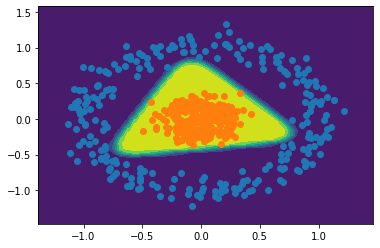

In [75]:
plot_decision_boundary(X, y)
scatter_plot()

prediction=1


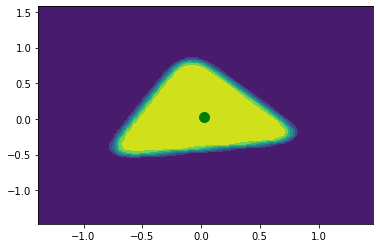

In [77]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
pred = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='green')
print(f'prediction={pred}')
plot_decision_boundary(X, y)